In [1]:
import pandas as pd
from sqlalchemy import create_engine
import datetime
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
engine = create_engine("sqlite:///hashtag2020.db", echo=True)
conn = engine.connect()

2021-02-07 13:54:18,678 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-02-07 13:54:18,679 INFO sqlalchemy.engine.base.Engine ()
2021-02-07 13:54:18,681 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-02-07 13:54:18,681 INFO sqlalchemy.engine.base.Engine ()


In [3]:
# #Create the table. If we use automap_base, the table must have a primary key
# conn.execute("""
#     CREATE TABLE IF NOT EXISTS tweet_counts (
#         created_at PRIMARY KEY
#         tweet VARCHAR(280)
#         likes integer
#         retweet_count integer
#         source VARCHAR(30)
#         user_location VARCHAR(30)
#         lat integer
#         long integer
#     )
# """)

In [4]:
trump_csv_path = "../hashtag_donaldtrump.csv"
biden_csv_path = "../hashtag_joebiden.csv"

In [5]:
trump_data_df = pd.read_csv(trump_csv_path, lineterminator='\n')
biden_data_df = pd.read_csv(biden_csv_path, lineterminator='\n')

In [6]:
trump_data_df["hashtag"]="Trump"
biden_data_df["hashtag"]="Biden"

In [7]:
tweet_df = pd.concat([trump_data_df, biden_data_df])

In [8]:
tweet_df["created_at"]=pd.to_datetime(tweet_df.created_at)

In [9]:
tweet_df.sort_values(by = 'created_at')

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Trump
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,Biden
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,Trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,Trump
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970917,2020-11-08 23:59:54,1.325589e+18,"@sammelbis1998 @iheartmindy @bnorthg First, yo...",0.0,0.0,Twitter for iPad,7.687811e+08,Debra,drdeblk,MD. Autism specialist. Film lover. #DumpTrump2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:56.012674,Trump
970918,2020-11-08 23:59:55,1.325589e+18,OK just had to do it !\n#Trump #CatapultTrump ...,105.0,28.0,Twitter Web App,4.519791e+08,Dunken K Bliths,DunkenKBliths,"""Tesla owner's will be followed back""\n\n#Mach...",...,✔ Official Twitter Account,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-11-09 17:47:55.807500,Trump
922910,2020-11-08 23:59:56,1.325589e+18,@nbcbayarea Who doesn’t like dogs or any kind ...,1.0,1.0,Twitter for iPhone,1.182639e+08,Dianna Maria,DiannaMaria,"~ I am a very proud mom of a sweet, kind and c...",...,United States,39.783730,-100.445882,NaN,United States,North America,NaN,NaN,2020-11-09 17:46:06.939099,Trump
737089,2020-11-08 23:59:57,1.325589e+18,#JoeBiden 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 https://t.co/Ym...,0.0,0.0,Twitter for iPhone,1.148479e+08,Nataša,PewPeeew,My brain consists of coping mechanisms and vin...,...,Deutschland,51.083420,10.423447,NaN,Germany,Europe,NaN,NaN,2020-11-09 18:26:04.550843,Biden


In [10]:
usa = {"United States of America" : "United States"}
tweet_df['country'].replace(usa, inplace=True)

In [11]:
clean_df = tweet_df.dropna(how='any')

In [12]:
clean_df = clean_df.loc[clean_df['country']== 'United States']

In [13]:
print("Count of duplicates: {}".format(clean_df.duplicated(subset=["tweet"]).sum()))

Count of duplicates: 21056


In [14]:
print("Original size of df: {}".format(len(clean_df)))
clean_df.drop_duplicates(subset=["tweet"], inplace=True, keep=False)
print("No duplicates size of df : {}".format(len(clean_df)))

Original size of df: 182384
No duplicates size of df : 141640


In [15]:
clean_df.reset_index(inplace=True)

In [16]:
##Create index for primary key
clean_df.reset_index(inplace=True)
clean_df.head()

,level_0,index,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,hashtag
0,0,2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,...,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump
1,1,4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,...,Washington DC,38.894992,-77.036558,Washington,United States,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump
2,2,12,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,...,"San Diego, CA",32.717421,-117.162771,San Diego,United States,North America,California,CA,2020-10-21 00:00:04.478598364,Trump
3,3,22,2020-10-15 00:01:14,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,...,Portland,45.520247,-122.674195,Portland,United States,North America,Oregon,OR,2020-10-21 00:00:08.210763668,Trump
4,4,29,2020-10-15 00:01:30,1.316530e+18,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,3.602439e+07,Baylee,...,"Western Washington, USA",41.882823,-87.686307,Chicago,United States,North America,Illinois,IL,2020-10-21 00:00:10.823279381,Trump


In [17]:
clean_df['Date'] = clean_df['created_at'].dt.strftime('%m/%d/%Y')
clean_df['Time'] = clean_df['created_at'].dt.strftime('%H:%M:%S')

In [18]:
clean_df = clean_df.rename(columns = {'index': 'id'}, inplace = False)
clean_df.head()

,level_0,id,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,...,long,city,country,continent,state,state_code,collected_at,hashtag,Date,Time
0,0,2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,...,-122.674195,Portland,United States,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Trump,10/15/2020,00:00:02
1,1,4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,...,-77.036558,Washington,United States,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,Trump,10/15/2020,00:00:08
2,2,12,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,...,-117.162771,San Diego,United States,North America,California,CA,2020-10-21 00:00:04.478598364,Trump,10/15/2020,00:00:26
3,3,22,2020-10-15 00:01:14,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,...,-122.674195,Portland,United States,North America,Oregon,OR,2020-10-21 00:00:08.210763668,Trump,10/15/2020,00:01:14
4,4,29,2020-10-15 00:01:30,1.316530e+18,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,3.602439e+07,Baylee,...,-87.686307,Chicago,United States,North America,Illinois,IL,2020-10-21 00:00:10.823279381,Trump,10/15/2020,00:01:30


In [19]:
clean_df = clean_df[['id', 'tweet', 'likes', 'retweet_count', 'source', 'lat', 'long', 'city','state_code','hashtag', 'Date', 'Time']]

In [20]:
clean_df = clean_df[['tweet', 'likes', 'retweet_count', 'source', 'lat', 'long', 'city','state_code','hashtag', 'Date', 'Time']]

In [21]:
clean_df.reset_index(inplace=True)

In [22]:
clean_df = clean_df.rename(columns = {'index': 'id'}, inplace = False)
clean_df.head()

,id,tweet,likes,retweet_count,source,lat,long,city,state_code,hashtag,Date,Time
0,0,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,45.520247,-122.674195,Portland,OR,Trump,10/15/2020,00:00:02
1,1,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,38.894992,-77.036558,Washington,DC,Trump,10/15/2020,00:00:08
2,2,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,32.717421,-117.162771,San Diego,CA,Trump,10/15/2020,00:00:26
3,3,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,45.520247,-122.674195,Portland,OR,Trump,10/15/2020,00:01:14
4,4,@karatblood @KazePlays_JC Grab @realDonaldTrum...,2.0,0.0,Twitter for iPhone,41.882823,-87.686307,Chicago,IL,Trump,10/15/2020,00:01:30


In [23]:
clean_df['id'].value_counts()

2047      1
34106     1
136552    1
44351     1
42302     1
         ..
125672    1
123625    1
129770    1
127723    1
0         1
Name: id, Length: 141640, dtype: int64

In [24]:
##Convert NaNs into Not Provided under user location columns
# str_cols = ['user_location', 'city', 'state', 'state_code', 'country']
# trump_data_df.loc[:, 'lat'] = trump_data_df.loc[:, 'lat'].fillna(91)
# trump_data_df.loc[:, 'long'] = trump_data_df.loc[:, 'long'].fillna(181)
# trump_data_df.loc[:, str_cols] = trump_data_df.loc[:, str_cols].fillna("Not Provided")
# trump_data_df.head()

In [25]:
#trump_data_df.describe()
##How to create dataframe that displays all rows that have not provided in them
#trump_data_df.loc[trump_data_df['user_location'] == 'Not Provided']

In [26]:
#trump_data_df.isnull().values.sum()

In [27]:
##Remove all cells that contain Nan
# trump_dropna_df = trump_data_df.dropna(how="all")
# trump_dropna_df.head(3)

In [28]:
##Split 'created_at' column into a Date and Time column
# trump_dropna_df['created_at'] = pd.to_datetime(trump_dropna_df['created_at'])
# trump_dropna_df['date'] = trump_dropna_df['created_at'].dt.strftime('%m/%d/%Y')
# trump_dropna_df['time'] = trump_dropna_df['created_at'].dt.strftime('%H:%M')

In [29]:
time_df = pd.DataFrame(clean_df)
time_df['date'] = pd.date_range('10/15/2020', periods=141640, freq='H')
time_df.head(3)

,id,tweet,likes,retweet_count,source,lat,long,city,state_code,hashtag,Date,Time,date
0,0,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,45.520247,-122.674195,Portland,OR,Trump,10/15/2020,00:00:02,2020-10-15 00:00:00
1,1,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,38.894992,-77.036558,Washington,DC,Trump,10/15/2020,00:00:08,2020-10-15 01:00:00
2,2,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,32.717421,-117.162771,San Diego,CA,Trump,10/15/2020,00:00:26,2020-10-15 02:00:00


In [40]:
##data.index = pd.to_datetime(data.index, unit='s')
time_df.date = pd.to_datetime(time_df.date, unit='H')
time_df.head(3)


,id,tweet,likes,retweet_count,source,lat,long,city,state_code,hashtag,Date,Time,date
0,0,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,45.520247,-122.674195,Portland,OR,Trump,10/15/2020,00:00:02,2020-10-15 00:00:00
1,1,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,38.894992,-77.036558,Washington,DC,Trump,10/15/2020,00:00:08,2020-10-15 01:00:00
2,2,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,32.717421,-117.162771,San Diego,CA,Trump,10/15/2020,00:00:26,2020-10-15 02:00:00


In [48]:
# time_df.date = pd.resample('3H').sum()
# time_three_df.head()

In [49]:
#Try grouping dates by month
x = time_df.date
y = clean_df.likes

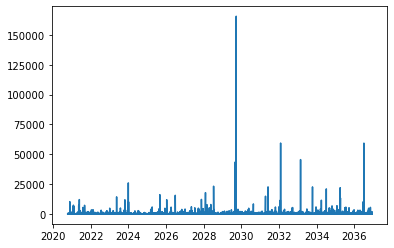

In [50]:
#Plotting bar graph to show how many tweets by day
plt.plot(x, y)
plt.show()

In [53]:
x = time_df.date
y = clean_df.retweet_count

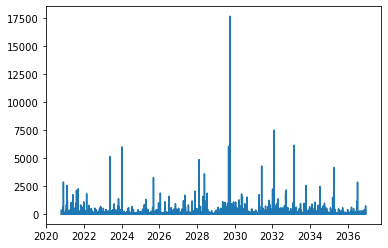

In [54]:
#Plotting bar graph to show how many tweets by day
plt.plot(x, y)
plt.show()

In [58]:
x = time_df.date
y = clean_df.state_code

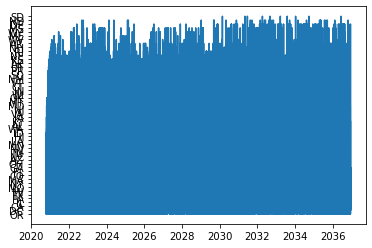

In [59]:
#Plotting bar graph to show how many tweets by day
plt.plot(x, y)
plt.show()

In [61]:
x = time_df.date
y = clean_df.source

/Users/buckleyweglarz/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/buckleyweglarz/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12510 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/buckleyweglarz/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/buckleyweglarz/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12488 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/buckleyweglarz/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12491 miss

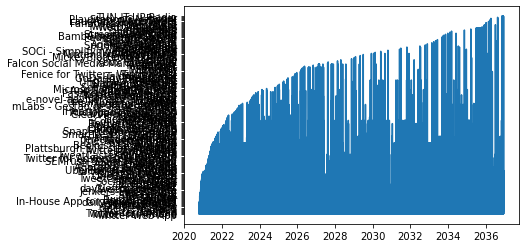

In [62]:
plt.plot(x, y)
plt.show()